In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from rich.console import Console
from rich import print
console = Console()
import config
import os
import pandas as pd
from PIL import Image
plt.style.use("ggplot")
%matplotlib inline

In [2]:
!python print_md.py

╔═════════════════════════════════════════════════════════════════════════════╗
║                              Download Dataset                               ║
╚═════════════════════════════════════════════════════════════════════════════╝

BaiDu Network Disk                                                             

Get Data                                                                       

passward kwj4                                                                  

if you have downloaded the dataset,the document structure should be as follows:

┌─────────────────────────────────────────────────────────────────────────────┐
│ ../                                                                         │
│     ./train_images                                                          │
│     ./test_images                                                           │
│     train.csv                                                               │
│     sample_submission.csv        

In [19]:
def histequality(img):
    for c in range(3):
        img[:,:,c] = cv.equalizeHist(img[:,:,c])
    return img

In [3]:
def pil_to_numpy(array):return np.asarray(array)
def numpy_to_pil(array):return Image.from_numpy(array)

In [4]:
root = config.parameter.get("ROOT")
console.log(os.listdir(root))

[15:48:40] [                                                                  ]8;id=209688;file://C:\Users\lenovo\AppData\Local\Temp\ipykernel_61244\2302850522.py\2302850522.py]8;;\:]8;id=438597;file://C:\Users\lenovo\AppData\Local\Temp\ipykernel_61244\2302850522.py#2\2]8;;\
               'dataset.tar.gz',                                                             
               'duanfeixiong_3c01751c.zip',                                                  
               'gdown_lv.py',                                                                
               'LV-MHP-v1',                                                                  
               'LV-MHP-v1.zip',                                                              
               'LV-MHP-v2',                                                                  
               'sample_submission.csv',                                                      
               'test_images',                                                                
               'train.csv',                                                                  
               'train_images'                                                                
           ]

In [5]:
df = pd.read_csv(os.path.join(root,"train.csv"))
df.head()

,image,labels
0,800113bb65efe69e.jpg,healthy
1,8002cb321f8bfcdf.jpg,scab frog_eye_leaf_spot complex
2,80070f7fb5e2ccaa.jpg,scab
3,80077517781fb94f.jpg,scab
4,800cbf0ff87721f8.jpg,complex


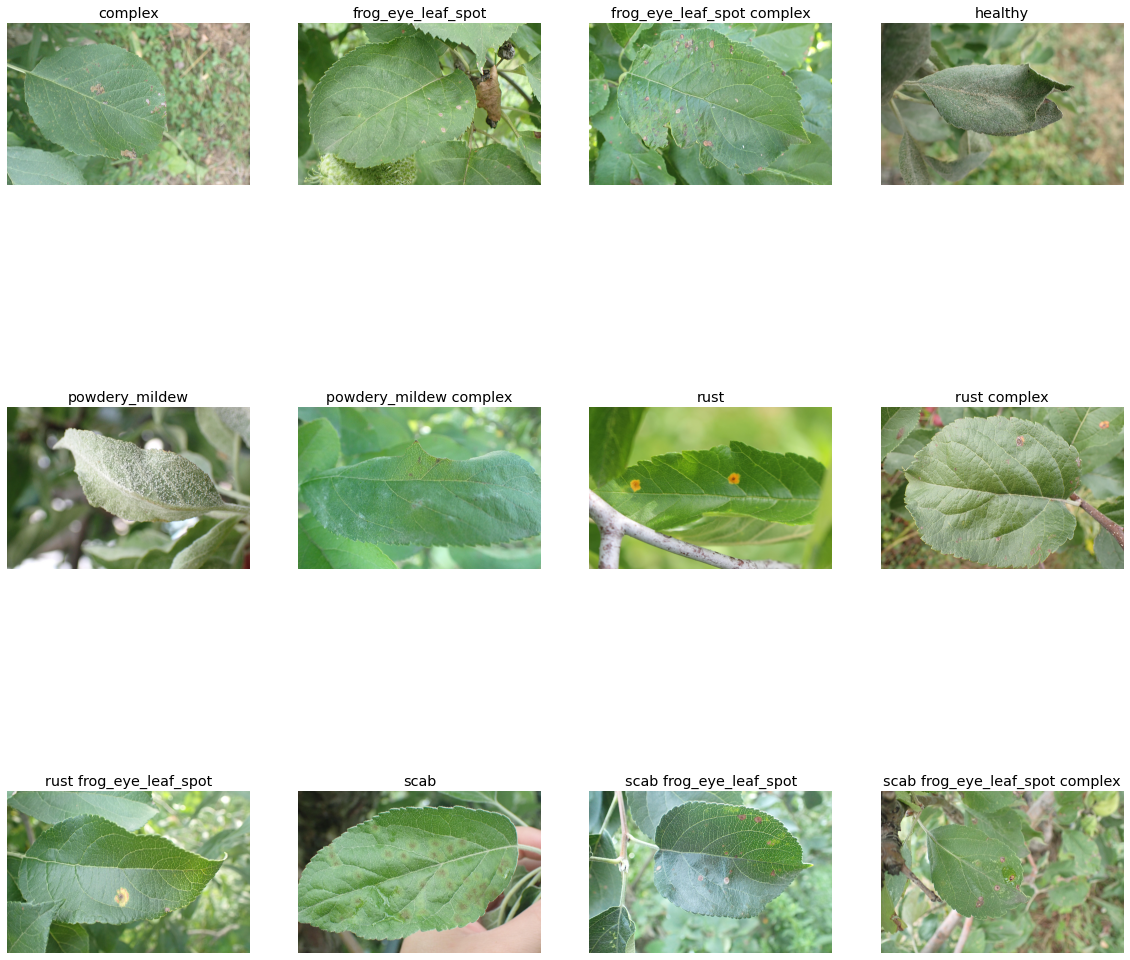

In [6]:
image_path = os.path.join(root,"train_images")
unique_label = np.unique(df['labels'])
plt.figure(figsize = (20,20))
for i,l in enumerate(unique_label):
    plt.subplot(3,4,i + 1)
    name = df[df['labels'] == l].values[0,0]
    plt.title(l)
    img = cv.imread(os.path.join(image_path,name))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.grid(False)
plt.show()

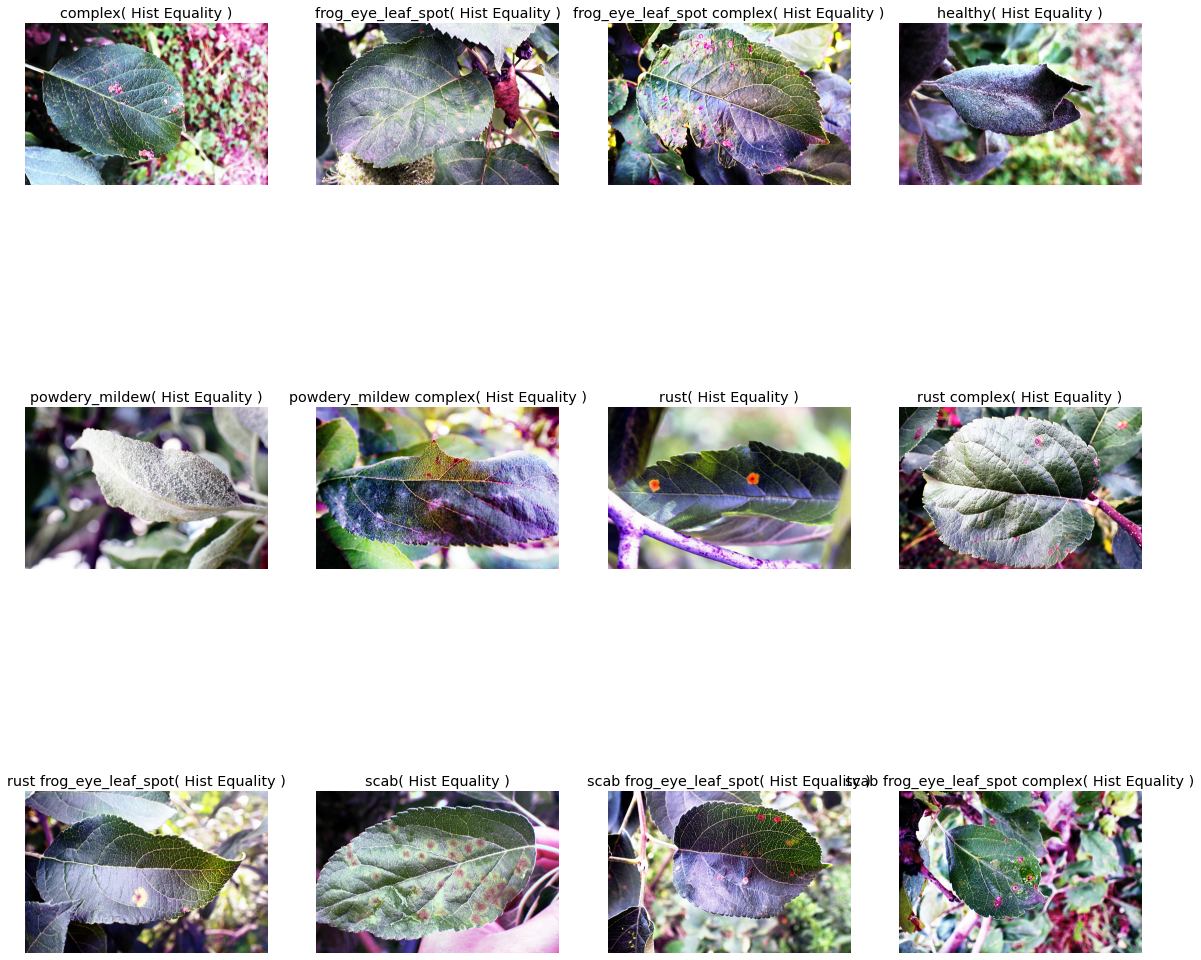

In [7]:
unique_label = np.unique(df['labels'])
plt.figure(figsize = (20,20))
for i,l in enumerate(unique_label):
    plt.subplot(3,4,i + 1)
    name = df[df['labels'] == l].values[0,0]
    plt.title(l + "( Hist Equality )")
    img = cv.imread(os.path.join(image_path,name))
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    img = histequality(img)
    plt.imshow(img)
    plt.axis("off")
    plt.grid(False)
plt.show()

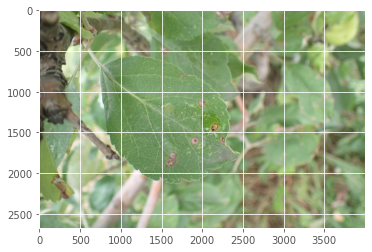

In [57]:
img = cv.imread(os.path.join(image_path,df['image'].values[1]))
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# img = histequality(img)
plt.imshow(img)

In [58]:
## feature extraction network
from albumentations.core.composition import Compose, OneOf
from albumentations.augmentations.transforms import CLAHE, GaussNoise, ISONoise
from albumentations.pytorch import ToTensorV2
import albumentations as A

In [59]:
import torch
import torch.nn.functional as F
import vision_transforms

In [60]:

image_size = config.parameter['image_size']
t1 = A.Resize(height=256, width=256)
t2 = A.ShiftScaleRotate(p=0.5)
t3 = A.RandomBrightnessContrast(p=0.5)
t4 = A.CLAHE()
t5 = A.CenterCrop(height = 224,width = 224)

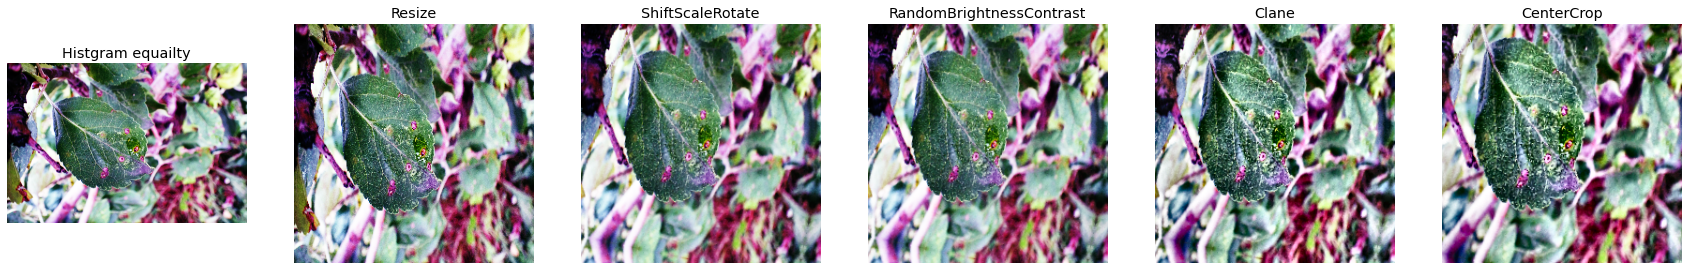

In [61]:
plt.figure(figsize= (30,10))
plt.subplot(1,6,1)
plt.title("Histgram equailty")
img    = histequality(img)
plt.imshow(img)
plt.axis("off")
plt.grid(False)
plt.subplot(1,6,2)
t1_out = t1(image = img)['image']
plt.title("Resize")
plt.imshow(t1_out)
plt.axis("off")
plt.grid(False)
t2_out = t2(image = t1_out)['image']
plt.subplot(1,6,3)
plt.title("ShiftScaleRotate")
plt.imshow(t2_out)
plt.axis("off")
plt.grid(False)
plt.subplot(1,6,4)
plt.title("RandomBrightnessContrast")
t3_out = t3(image = t2_out)['image']
plt.imshow(t3_out)
plt.axis("off")
plt.grid(False)
plt.subplot(1,6,5)
plt.title("Clane")
t4_out = t4(image = t3_out)['image']
plt.imshow(t4_out)
plt.axis("off")
plt.grid(False)
plt.subplot(1,6,6)
plt.title("CenterCrop")
t5_out = t5(image = t4_out)['image']
plt.imshow(t5_out)
plt.axis("off")
plt.grid(False)

In [ ]:
trasform_3 = Compose(
    [
        A.Lambda(histequality),
        A.Resize(height=256, width=256),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.CLAHE(),
        A.CenterCrop(height = 224,width = 224)
         
    ]
)